In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import random as rnd
import os
import math

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

from pprint import pprint
import functools as ft

initialization
$
\newcommand{\Brace}[1]{\left\{#1\right\}}
\newcommand{\Bracket}[1]{\left[#1\right]}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\EXP}[1]{\exp\left\{#1\right\}} 
\newcommand{\frachalf}[1]{\frac{#1}{2}}
\newcommand{\fracone}[1]{\frac{1}{#1}}
\newcommand{\fracrec}[1]{\frac{1}{#1}}
\newcommand{\half}{\fracone{2}}
\newcommand{\H}[1]{\mathbb{H}\left[#1\right]}
\newcommand{\inv}[1]{#1^{-1}}
\newcommand{\invp}[1]{\left({#1}\right)^{-1}}
\newcommand{\KL}[2]{\text{KL}\left(#1 \Vert #2\right)}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Ln}[1]{\ln \left\(#1\right\)}
\newcommand{\Lnb}[1]{\ln \left\{#1\right\} }
\newcommand{\LN}[1]{\ln\left\{#1\right\}} 
\newcommand{\Mod}[1]{\left|#1\right|}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\Normsqr}[1]{\Norm{#1}^2}
\newcommand{\map}[1]{#1_{\text{MAP}}}
\newcommand{\ml}[1]{#1_{\text{ML}}}
\newcommand{\MI}[1]{\mathcal{I}\left(#1\right)}
\newcommand{\P}{\mathbb{P}}
\newcommand{\Partial}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\sqrbrkt}[1]{\Bracket{#1}^2}
\newcommand{\sqrbrc}[1]{\Brace{#1}^2}
\newcommand{\trace}[1]{\text{Tr}\left( #1 \right)}
\newcommand{\traceb}[1]{\text{Tr}\left\{#1\right\}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
$
$
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
$
$
\newcommand{\mat}[1]{ \left[ \begin{matrix} #1 \end{matrix} \right] }
\newcommand{\matp}[1]{ \left( \begin{matrix} #1 \end{matrix} \right)}
\newcommand{\mats}[1]{ \begin{matrix}#1\end{matrix} }
\newcommand{\arrthree}[1]{
\begin{array}{rlr} #1 \end{array}}
$
$
\newcommand{\C}{\mathbb{C}}
\newcommand{\Ca}{\mathcal{C}}
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\I}{\mathcal{I}}
\newcommand{\L}{\mathcal{L}}
\newcommand{\M}{\mathcal{M}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Ra}{\mathcal{R}}
$
$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
$

sum, product
$
\newcommand{\sumi}{\displaystyle \sum_i}
\newcommand{\sumiD}{\displaystyle \sum_{i=1}^{D}}
\newcommand{\sumiL}{\displaystyle \sum_{i=1}^{L}}
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodi}{\displaystyle \prod_i}
\newcommand{\prodiD}{\displaystyle \prod_{i=1}^{D}}
\newcommand{\prodiL}{\displaystyle \prod_{i=1}^{L}}
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet shortcuts
$
\newcommand{\ab}{\mathbf{a}}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\At}{\Ab^T}
\newcommand{\Ai}{\inv{\Ab}}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\bt}{\bb^T}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\fb}{\mathbf{f}}
\newcommand{\fp}{f^{\prime}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\hx}{h(\xb)}
\newcommand{\Jb}{\mathbf{J}}
\newcommand{\Kb}{\mathbf{K}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lt}{\Lb^T}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\mt}{\mb^T}
\newcommand{\mbn}{\mb_N}
\newcommand{\mbnt}{\mbn^T}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\sb}{\mathbf{s}}
\newcommand{\Sb}{\mathbf{S}}
\newcommand{\tb}{\mathbf{t}}
\newcommand{\tt}{\tb^T}
\newcommand{\Tb}{\mathbf{T}}
\newcommand{\Tt}{\Tb^T}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Ub}{\mathbf{U}}
\newcommand{\Ut}{\Ub^T}
\newcommand{\vb}{\mathbf{v}}
\newcommand{\Vb}{\mathbf{V}}
\newcommand{\wb}{\mathbf{w}}
\newcommand{\wt}{\wb^T}
\newcommand{\Wb}{\mathbf{W}}
\newcommand{\Wt}{\Wb^T}
\newcommand{\Wtilde}{\widetilde{\Wb}}
\newcommand{\Wtildet}{\Wtilde^T}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\Xtilde}{\widetilde{\Xb}}
\newcommand{\Xtildet}{\Xtilde^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xt}{\xb^T}
\newcommand{\xtilde}{\widetilde{\xb}}
\newcommand{\xtilden}{\xtilde_n}
\newcommand{\xtildent}{\xtilden^T}
\newcommand{\xp}{x^{\prime}}
\newcommand{\xbp}{\xb^{\prime}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\yx}{y(\xb)}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zt}{\zb^T}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
$

math shortcuts
$
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\Lambdab}{\pmb{\Lambda}}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\Lambda^{-1}}
\newcommand{\Li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\mut}{\mub^T}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\Phib}{\pmb{\Phi}}
\newcommand{\Phibt}{\Phib^T}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\sigmasqr}{\sigma^2}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$
$
\newcommand{\zerob}{\pmb{0}}
\newcommand{\ed}{\mathbb{E}_{\D}}
\newcommand{\edyx}{\ed\left[y(\xb ; \D)\right]}
\newcommand{\dx}{~dx}
\newcommand{\dxb}{~d\xb}
\newcommand{\pxdxb}{p(\xb) \dxb}
\newcommand{\dwb}{~d\wb}
$

aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T 
 #2
 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$
$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
$

# Introduction

* In regression, we used $y(\xb) = \wt \xb + w_o$
* But we need a discrete output
* Thus, we define $y(\xb) = f(\wt \xb + w_o)$
* Here, f(.) is a nonlinear function
  * called as activation function in ML
  * $f^{-1}$ called link function in statistics
* f(.) is called *Generalized linear model* since the decision surfaces correspond to f(.) = const => $\wt \xb + w_0$ = constant

# Least squares for classification

* Let there be K classes $\{\mathcal{C}_k\}$, each with its own linear model
$$
y_k(\xb) = \wb_k^T  \xb + w_{k0}
$$

* These can be grouped together as 
$$
\yb(\xb) = \Wtildet \xtilde
$$
where
$$
\Wtilde = 
\mat{
w_{10} & w_{20} & \cdots & w_{K0} \\
\wb_1 & \wb_2 & \cdots & \wb_{K}
}
\hspace{20pt}
\xtilde = \mat{1 \\ \xb}
$$

* Training set $\{\xb_n, \tb_n \}_{n=1}^{N}$
* Let 
$$
\Tb = \mat{\vdots \\ - \tb_n^T- \\ \vdots \\}
\hspace{20pt}
\Xtilde = \mat{
\vdots \\
-\xtildent- \\
\vdots
}
$$
* Sum of squres error function becomes
$$
E_D(\Wtilde)
=
\frac{1}{2}
\trace{
\left( \Xtilde \Wtilde - \Tb \right)^T
\left( \Xtilde \Wtilde - \Tb \right)
}
$$

lets consider Tr($(\Xb\Wb - \Tb)^T(\Xb\Xb - \Tb)$)
$$
\arrthree{
d E_D
&=
\half d ~\traceb{(\Xb\Wb - \Tb)^T(\Xb\Xb - \Tb)}
\\ &=
\half d ~\traceb{ \Wt\Xt\Xb\Wb - \Wt\Xt\Tb - \Tt\Xb\Wb - \Tt\Tb }
}
$$

$$
\arrthree{
\text{First two terms } &=\traceb{ d(\Wt)\Xt\Xb\Wb + \Wt\Xt\Xb ~d(\Wb)}
\\ &=
\traceb{ (d\Wb)^T\Xt\Xb\Wb + \Wt\Xt\Xb ~d\Wb}
\\ &=
\traceb{\Wt\Xt\Xb ~d\Wb }
+
\traceb{\Wt\Xt\Xb ~d\Wb }
\\ &=
2\traceb{\Wt\Xt\Xb ~d\Wb }
}
$$

$$
\arrthree{
\text{Last two terms }&=
d ~\traceb{ - \Tt\Xb\Wb - \Tt\Tb }
\\ &=
-\traceb{d(\Wt)\Xt\Tb + \Tt\Xb~d(\Wb)}
\\ &=
-\traceb{ (d\Wb)^T\Xt\Tb + \Tt\Xb~d\Wb }
\\ &=
-  \traceb{\Tt\Xb~d\Wb } - \traceb{\Tt\Xb~d\Wb }
\\ &=
-2 \traceb{\Tt\Xb~d\Wb }
}
$$

Hence
$$
\arrthree{
\frac{d ~E_D}{d\Wb}
&=
\Wt\Xt\Xb - \Tt\Xb
& \color{gray}{\text{Denominator layout}}
\\
&=
\Xt\Xb\Wb - \Xt\Tb
& \color{gray}{\text{Numerator layout}}
}
$$

$$
\frac{E_D\left(\Wtilde\right)}{d\Wtilde}
=
\Xtildet\Xtilde\Wtilde - \Xtildet\Tb
$$
Setting this to zero, we get
$$
\Wtilde = \left( \Xtildet \Xtilde \right)^{-1} \Xtildet \Tb
= \Xtilde^\dagger \Tb
$$
The discriminant function becomes
$$
\yb(\xb) = \Wtildet \xb = \Tt \left( \Xtilde^\dagger \right)^T \xb
$$

In [2]:
def rand_range(imin=0, imax=1):
    return np.random.rand(n1).reshape(-1,1)*imax-imin
def points_class1(n1 = 50, noise_sigma=3, noise_offset=0.3, plot_vals=False):
    x1 = np.random.rand(n1).reshape(-1,1)*8-4
    y_noise = np.random.rand(n1).reshape(-1,1)*noise_sigma+noise_offset
    y1 = x1 + y_noise
    x1_aug = np.hstack((np.ones_like(x1), x1,y1))
    t1 = np.hstack((np.ones_like(x1), np.zeros_like(x1)))
    if plot_vals:
        plt.plot(x1, y1, '+', label='class1')
    return (x1_aug, t1)

def points_class2(n2=50, noise_sigma=3, noise_offset=0.5, plot_vals=False, add_outliers=False):
    x2 = (np.random.rand(n2)*4).reshape(-1,1)
    y_noise = (np.random.rand(n2)*noise_sigma+noise_offset).reshape(-1,1)
    y2 = x2 - y_noise
    
    if add_outliers:
        n2_outlier = 10
        x2_outlier = (np.random.rand(n2_outlier)*2+6).reshape(-1,1)
        y2_outlier = (np.random.normal(-6,1,(n2_outlier,1))).reshape(-1,1)
        x2 = np.vstack((x2,x2_outlier))
        y2 = np.vstack((y2,y2_outlier))
    
    x2_aug = np.hstack((np.ones_like(x2), x2,y2))
    t2 = np.hstack((np.zeros_like(x2), np.ones_like(x2)))
    if plot_vals:
        plt.plot(x2, y2, 'o', label='class2')
    return (x2_aug, t2)


In [3]:
def compute_w(X,T):
    W = np.linalg.inv(X.T @ X) @ X.T @ T
    print('W:',W.shape)
    return W
# start from the bottom, ie, from -\infty
# find the first y coordinate for which the prediction>0 => class 2 ends, class 1 begins
def find_y(W, x, y_arr):
    pts_current = np.hstack((np.ones_like(y_arr),np.ones_like(y_arr)*x, y_arr))
    vals = pts_current @ W
    diff = (vals[:,0] - vals[:,1]).tolist()
    ix_first = next((xx1[0] for xx1 in enumerate(diff) if xx1[1]>0),-1)
    return y_arr[ix_first]
def plot_line():
    xplot = np.linspace(-4,4,100)
    plt.plot(xplot, xplot, label='expected seperation')


W: (3, 2)


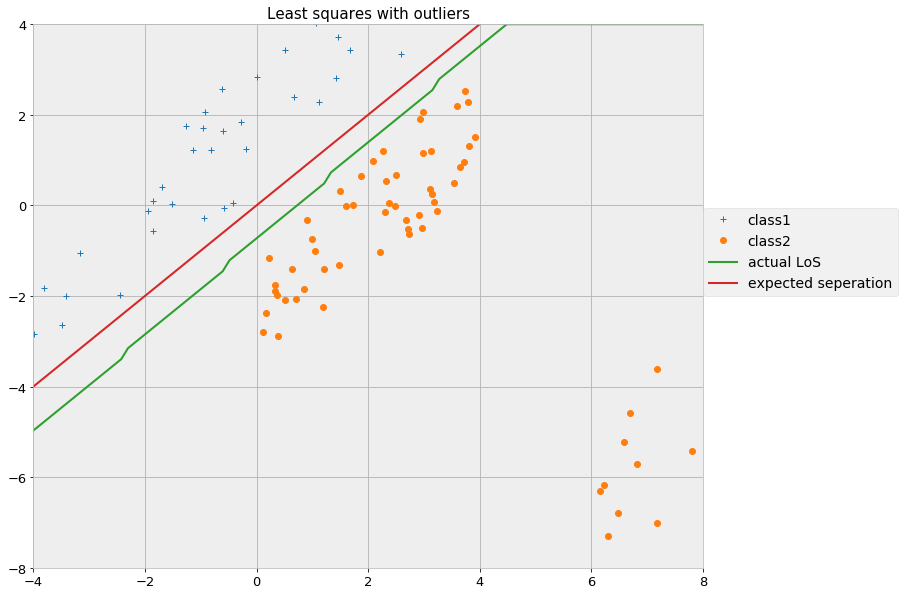

<function __main__.show_solution>

In [4]:

def show_solution(add_outliers=True):
    x1_aug, t1 = points_class1(50, plot_vals=True)
    x2_aug, t2 = points_class2(50, plot_vals=True, add_outliers=add_outliers)

    X = np.vstack((x1_aug,x2_aug))
    T = np.vstack((t1,t2))
    W = compute_w(X,T)
    
    x_end = 8 if add_outliers else 4
    x_actual = np.linspace(-4,x_end,100).reshape(-1,1)
    y_arr = np.linspace(-8,4,100).reshape(-1,1)
    y_actual = [find_y(W, xx, y_arr) for xx in x_actual]
    plt.plot(x_actual, y_actual, label='actual LoS')

    #plot_regions(W, resolution=resolution)
    plot_line()
    str_connector = 'with' if add_outliers else 'w/o'
    plt.title('Least squares '+str_connector+' outliers')
    location = 'lower center' if add_outliers else 'lower right'
    plt.legend(loc=(1,0.5))
    plt.xlim(-4,8)
    plt.ylim(-8,4)
    plt.show()

#show_solution()
interact(show_solution)

In the previous figure, without outliers, the decision surface is fine.   
But on addition of outliers on the "right" side of the decision surface leads to a bad decision surface.  
Not cool, least squares

# Fisher's

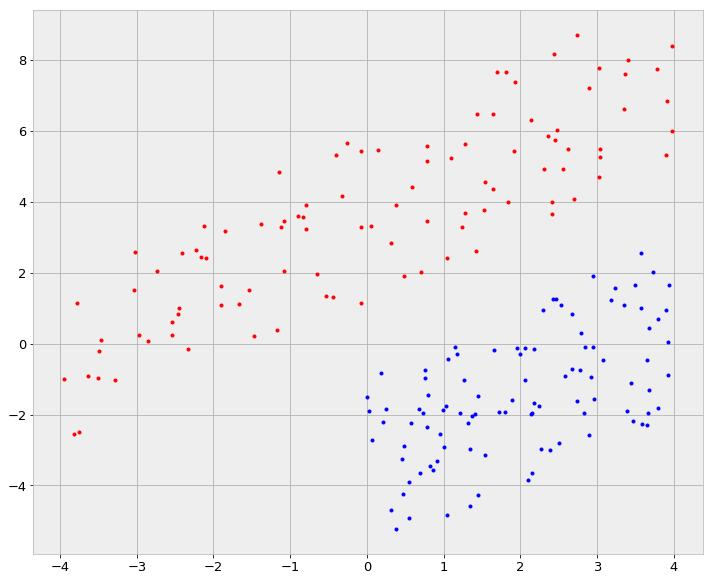

In [5]:
# get the points of class 1, 2
x1_aug, t1 = points_class1(100, noise_sigma=5, noise_offset=1, plot_vals=False)
x2_aug, t2 = points_class2(100, noise_sigma=5, noise_offset=1, plot_vals=False)
plt.plot(x1_aug[:,1],x1_aug[:,2],'.r')
plt.plot(x2_aug[:,1],x2_aug[:,2],'.b')
plt.show()

$$
\arrthree{
\mb_1 = \fracone{N1} \sum_{n \in \Ca_1} \xbn &&
\mb_2 = \fracone{N2} \sum_{n \in \Ca_2} \xbn \\
&\wb \propto (\mb_1 - \mb_2)&
}
$$

In [6]:
def find_perp_line_equation(pt1, pt2, pt_on_line=None):
    assert((pt1.shape == pt2.shape) and (pt1.size==2))
    if pt_on_line is None:
        pt_on_line = (pt1+pt2)/2.
    # slope of perp = -(x2-x1)/(y2-y1)
    slope = -1.*(pt2[0] - pt1[0])/(pt2[1] - pt1[1])
    # y3 = m * x3 + c
    y_intercept = pt_on_line[1] - slope * pt_on_line[0]
    return (slope, y_intercept)
    
def plot_bounded_line(slope, y_intercept, plt_obj, color, linewidth):
    x_lims, y_lims = plt_obj.xlim(), plt_obj.ylim()
    x = np.linspace(x_lims[0], x_lims[1], 100)
    y = 1.*slope*x + y_intercept
    plt_obj.plot(x, y, c=color, linewidth=linewidth)
    plt_obj.xlim(x_lims); plt_obj.ylim(y_lims)

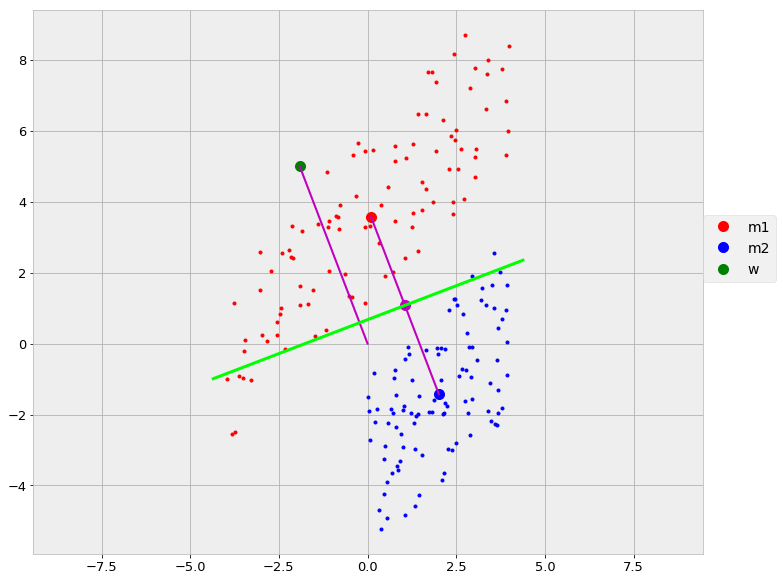

In [7]:
plt.plot(x1_aug[:,1],x1_aug[:,2],'.r')
plt.plot(x2_aug[:,1],x2_aug[:,2],'.b')

# find m1 and m2
m1 = np.average(x1_aug, axis=0)
m2 = np.average(x2_aug, axis=0)
plt.plot(m1[1],m1[2], 'or', MarkerSize=10, label='m1')
plt.plot(m2[1],m2[2], 'ob', MarkerSize=10, label='m2')

w = m1-m2
plt.plot(w[1],w[2], 'og', MarkerSize=10, label='w')
plt.plot((m1[1],m2[1]),(m1[2],m2[2]), 'm')
plt.plot((0,w[1]),(0, w[2]), 'm')
plt.plot((m1[1]+m2[1])/2., (m1[2]+m2[2])/2., 'om', MarkerSize=10)
m, c = find_perp_line_equation(m1[1:], m2[1:])
plt.axis('equal')
plt.legend(loc=(1,0.5))
plot_bounded_line(m, c, plt, color=(0,1,0), linewidth=3)
#plt.grid()
plt.show()

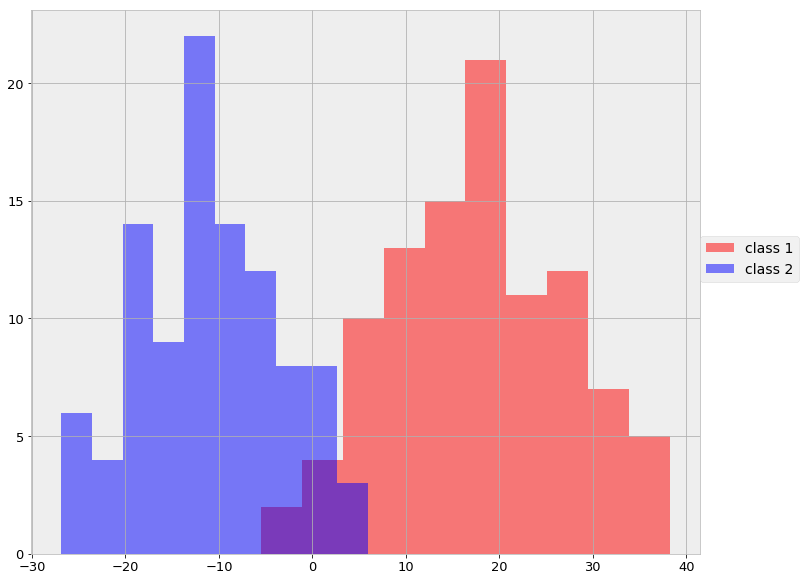

In [8]:
projections1 = [w @ x for x in x1_aug]
projections2 = [w @ x for x in x2_aug]
plt.hist(projections1,color='r', alpha=0.5, label='class 1')
plt.hist(projections2,color='b', alpha=0.5, label='class 2')
plt.legend(loc=(1,0.5))
plt.show()

As it can be seen, the histograms overlap.  
the naive way sucks, as naive ways do.  
Lets see what Fisher has to offer

Denote the class mean as $\mb_k = \displaystyle \fracone{|\Ca_k|} \sum_{x_n \in \Ca_k} x_n$

Define  
$\arrthree{
m_k &= \wt \mb_k
\\
y_n &= \wt \xbn
}$

The within class variance is $s_k^2 = \displaystyle \sum_{n \in \Ca_k} (y_n - m_k)^2$

hence, total within-class variance is given by $s_1^2 + s_2^2$.  

Now Fisher's criterion can be defined as the ratio of the between-class variance to the total within-class variance. That is
$$
\Jb(\wb) = 
\frac{(m_2 - m_1)^2}{s_1^2 + s_2^2}
=
\frac{\wt \Sb_B \wb}{\wt \Sb_W \wb}
$$
where
$$
\arrthree{
\Sb_B &= (\mb_2 - \mb_1)(\mb_2 - \mb_1)^T \\
\Sb_W &= 
\displaystyle \sum_{n \in \Ca_1} (\xbn - \mb_1)(\xbn - \mb_1)^T
+ \displaystyle \sum_{n \in \Ca_2} (\xbn - \mb_2)(\xbn - \mb_2)^T
}
$$

Diff wrt $\wb$  
$\arrthree{
\displaystyle 
\frac{d\Jb}{\dwb} &= 0 
\\ \displaystyle 
\frac{2 \Sb_B \wb}{\wt \Sb_W \wb}
- (\wt \Sb_B \wb) \fracone{(\wt \Sb_W \wb)^2} 2 \Sb_W \wb
&= 0
\\ \displaystyle
(\wt \Sb_B \wb) (2 \Sb_W \wb) &= (\wt \Sb_W \wb)(2 \Sb_B \wb)
}$

Since $\Sb_B = (\mb_2 - \mb_1)(\mb_2 - \mb_1)^T$, we have $\Sb_B \wb$ in the direction of $(\mb_2 - \mb_1)$  
Also $\wt \Sb_B \wb$ and $\wt \Sb_W \wb$ are scalars.  
Hence
$$
\wb \propto \inv{\Sb_W} (\mb_2 - \mb_1)
$$

In [9]:
def compute_sw(x, m):
    assert((x[0,:].shape == m.shape))
    d = x.shape[1]
    sw = np.zeros((d,d))
    for xx in x:
        diff = (xx - m).reshape(-1,1)
        sw = sw + diff @ diff.T
    return sw

w:  [[ 0.01945956 -0.01756211]]


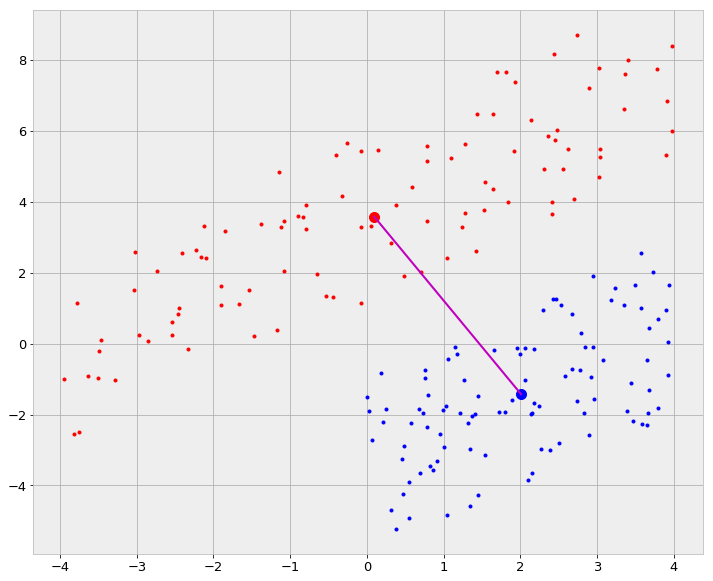

In [10]:
plt.plot(x1_aug[:,1],x1_aug[:,2],'.r')
plt.plot(x2_aug[:,1],x2_aug[:,2],'.b')

# find m1 and m2
m1 = np.average(x1_aug, axis=0)
m2 = np.average(x2_aug, axis=0)
sw_1 = compute_sw(x1_aug[:,1:], m1[1:])
sw_2 = compute_sw(x2_aug[:,1:], m2[1:])
swi = np.linalg.inv(sw_1 + sw_2)
w = swi @ (m2-m1)[1:].reshape(-1,1)
print('w: ',w.T)

plt.plot(m1[1],m1[2], 'or', MarkerSize=10, label='m1')
plt.plot(m2[1],m2[2], 'ob', MarkerSize=10, label='m2')
plt.plot((m1[1],m2[1]),(m1[2],m2[2]), 'm')
plt.show()

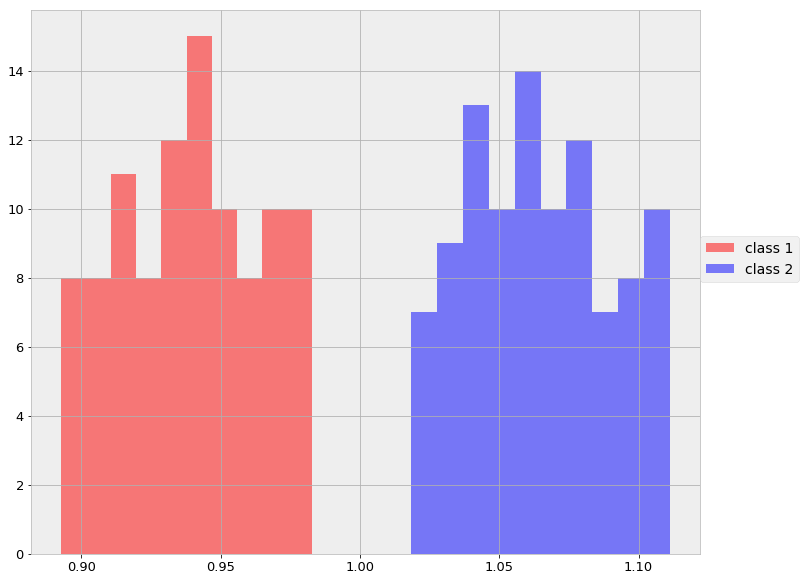

In [11]:
w_aug = np.insert(w, 0, 1)
projections1 = [w_aug @ x for x in x1_aug]
projections2 = [w_aug @ x for x in x2_aug]
plt.hist(projections1,color='r', alpha=0.5, label='class 1')
plt.hist(projections2,color='b', alpha=0.5, label='class 2')
plt.legend(loc=(1,0.5))
plt.show()

Isn't this cool. there is a clear separation and we won. Now how do we determine the threshold?  
Find the min and max of both the projections. This gives us two ranges, range1 and range2.  
Sort the ranges $r_i$ by the min vals.  
If there are nonoverlapping, then if $\max(r_{i-1}) \le \min(r_{i}))$ for $i \in [1, N-1]$, then we are good

In [12]:
from operator import itemgetter
# gimme an array of tuples of form (min, max)
def are_ranges_nonoverlapping(ranges):
    # key is redundant since tuples are compared position by position
    # but then again, cant resist showing offs
    thresholds = []
    ranges_s = sorted(ranges, key=itemgetter(1))
    for ix in range(1,len(ranges_s)):
        # max(r_{i-1}) > min(r_{i})
        if ranges_s[ix-1][1] > ranges_s[ix][0]:
            return (False, None)
        else:
            thresholds.append((ranges_s[ix][0]+ranges_s[ix-1][1])/2.)
    return (True, thresholds)
def form_ranges(projectionss):
    return [(min(projections), max(projections)) for projections in projectionss]
are_ranges_nonoverlapping(form_ranges([projections2, projections1]))

(True, [1.0005324886268641])

# Fisher's and Least squares

Basically they are the same. so fuck off.

# Fisher's for multiple classes

Assumptions:
* K > 2
* D > K

Introductin $D^{\prime} > 1$ linear features $y_k = \wb_k^T \xb$ where $k = 1, \cdots, D^{\prime}$. That is,
$$
\mat{y_1 \\ \vdots \\ y_{D^{\prime}}} = 
\mat{\wb_1^T \xb \\ \vdots \\ \wb_{D^{\prime}}^T \xb} = 
\mat{-\wb_1^T- \\ \vdots \\ -\wb_{D^{\prime}}^T-} \xb = 
\Wt \xb
$$

Define the within class covar
$$
\arrthree{
\Sb_W &= \sumkK \Sb_k \\
\text{where }
\Sb_k &= \displaystyle \sum_{n \in \Ca_k} (\xb - \mb_k) (\xb - \mb_k)^T \\
\mb_k &= \fracrec{N_k} \displaystyle \sum_{n \in \Ca_k} \xb_n
}
$$

COnsider the total covar 
$$
\arrthree{
\Sb_T &= \sumnN (\xb_n - \mb) (\xb_n - \mb)^T \\
\text{where }
\mb &= \fracrec{N} \sumnN \xb_n = \fracrec{N} N_k \mb_k
}
$$

We gonna prove $\Sb_T = \Sb_W + \Sb_B$ where
$$
\Sb_B = \sumkK N_k (\mb_k - \mb) (\mb_k - \mb)^T
$$

$$
\arrthree{
\Sb_W + \Sb_B &=
\sumkK 
\Brace{ N_k (\mb_k - \mb) (\mb_k - \mb)^T + \sum_{n \in \Ca_k} (\xb_n - \mb_k) (\xb_n - \mb_k)^T}
\\ &=
\sumkK  \sum_{n \in \Ca_k} 
(\mb_k - \mb) (\mb_k - \mb)^T + (\xb_n - \mb_k) (\xb_n - \mb_k)^T
}
$$

$
\newcommand{\mk}{\mb_k}
\newcommand{\mkt}{\mk^T}
\newcommand{\mt}{\mb^T}
\newcommand{\xn}{\xb_n}
\newcommand{\xnt}{\xn^T}
\newcommand{\sumnck}{\sum_{n \in \Ca_k}}
$

$$
\overbrace{\xn \xnt}^{1} - \overbrace{\xn \mkt}^{2} - \overbrace{\mkt \xnt}^{3} + \overbrace{\mk \mkt}^{4} \\
\underbrace{\mk \mkt}_{5} - \underbrace{\mk \mt}_{6} - \underbrace{\mb \mkt}_{7} + \underbrace{\mb \mt}_{8}
$$

$$
\arrthree{
1 &= \sumnN \xn \xnt \\
2,3 &= -2\sumkK \sumnck \xn \mkt &= -2\sumkK N_k \mk \mkt \\
4,5 &= +2\sumkK \sumnck \mk \mkt &= +2\sumkK N_k \mk \mkt \\
6 &= -\sumkK \sumnck \mk \mt &= -\mt \sumkK \sumnck \mk & = -\mt \sumnN \xn \\
7 &= -\mb \sumnN \xt \\
8 &= \sumnN \mb \mt 
}
$$

Thus
$$
\Sb_W + \Sb_B = \sumnN
\Brace{\xn \xnt - \mt \xn \mb \xnt + \mb \mt} = \sumnN (\xn - \mb) (\xn - \mb)^T
$$

These covar matrices are defined in the **x**-space. We can define similar matrices in $D^{\prime}$ **y**-space
$$
\arrthree{
\sb_W &= \sumkK \sum_{n \in \Ca_k} (\yb_n - \mub_k) (\yb_n - \mub_k)^T \\
\sb_B &= \sumkK N_k (\mub_k - \mub) (\mub_k - \mub)^T \\
\text{where} \\
\mub_k &= \fracrec{N_k} \displaystyle \sum_{n \in \Ca_k} \yb_n \\
\mub &= \fracrec{N} \sumkK N_k \mub_k
}
$$

Now, we want to formulate a score which is large when $\sb_B$ is large and $\sb_W$ is small. One such criteria is
$$
\Jb(\Wb) = \traceb{\inv{\sb_W} \sb_B}
$$

There is one important result that is common to all such criteria.  

* $\Sb_B$ is composed of the sum of K matrices, each of which is an outer product of two vectors and therefore of rank 1. 
* Only (K − 1) of these matrices are independent as a result of the constraint $\mb = \fracrec{N} \sumkK N_k \mb_k$.
* Thus, $\Sb_B$ has rank at most equal to (K − 1) and so there are at most (K − 1) nonzero eigenvalues.
* Hence, the projection onto the (K−1)-dimensional subspace spanned by the eigenvectors of $\Sb_B$ does not alter the value of **J(W)**
* That is, we can't find more than (K − 1) linear "features" by this means \citeme(Fukunaga, 1990).

# Perceptron

Two class model in which **x** is transformed by $\phi(\xb)$ and then used to construct a generalized linear model of the form
$$
y(\xb) = f(\wt \phi(\xb)) 
$$
where f(.) is given by
$$
f(a) = \begin{cases}
+1 & a \ge 0 \\
-1 & a \lt 0
\end{cases}
$$

## Alternate error function  

if **x** is in class 1, $\wt \phi(\xb_n) \gt 0$ else it is < 0.   
That is $t_n \wt \phi(\xb_n) > 0$ for correctly classified points and negative for misclassified points.  
Thus, the error function becomes,  
$E_P(\wb) = - \displaystyle \sum_{n \in \M} \wt \phi(\xb_n) t_n$

## Stochastic gradient descent  

$
\wb^{\tau + 1} = \wb^{\tau} - \eta \nabla E_P(\wb)
= \wb^{\tau} + \eta \phi(\xb_n) t_n
$

## Effect of single update

$\arrthree{
-\wb^{(\tau+1)T} \phi(\xb_n) t_n &=
-(\wb^{(\tau)} + \eta \phi(\xb_n) t_n)^T \phi(\xb_n)
\\ &=
- \wb^{(\tau) T} \phi(\xb_n) t_n - \eta (\phi(\xb_n) t_n)^T (\phi(\xb_n) t_n)
\\ & <
 - \wb^{(\tau) T} \phi(\xb_n) t_n
}$

## Convergence

Perceptron convergence theorem  
\citeme{Rosenblatt (1962), Block (1962), Nilsson (1965), Minsky and Papert (1969), Hertz et al. (1991), and Bishop (1995a).}

## Problems

* Convergence achievable and slow or unachievable?
* Solution depends on initialization and order of points
* Outputs not probabilistic
* doesn't generalize well for K>2 classes
* Fixed set of basis functions

## Experiments

Perceptron w/o stoppage

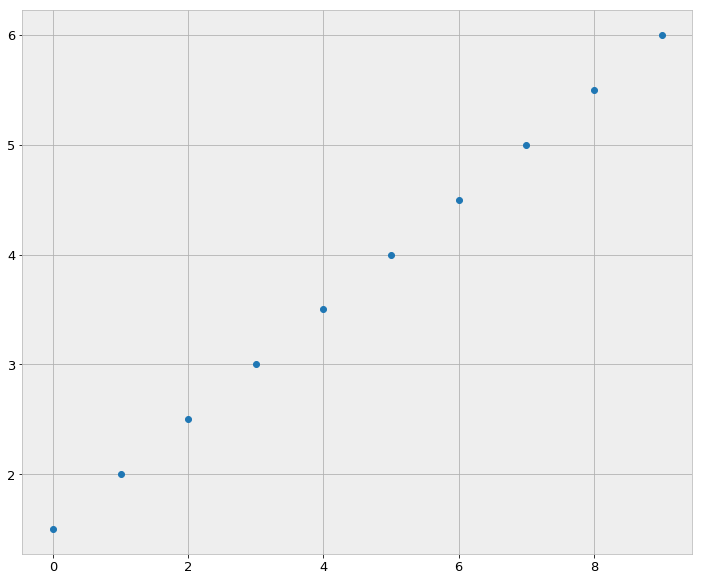

In [13]:
# the original line
a, b = np.matrix((1, -2)), 3.0
x = range(10)
# <a,pt> = b
# => a_0*x + a_1*y = b
# => y = (b - a_0*x) / a_1
y = (-b - x * a[0, 0])*1.0 / a[0, 1]
plt.plot(x, y, 'o')
plt.show()

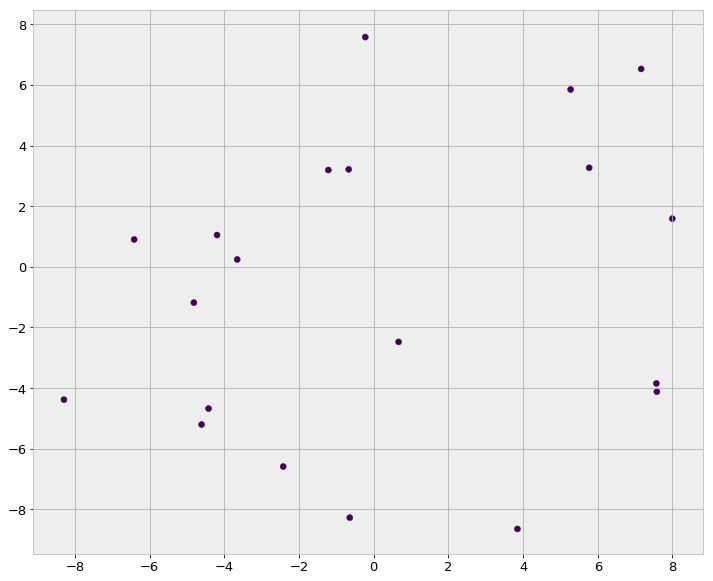

In [14]:
# generate random points
val_min = min(min(x), min(y))
val_max = max(max(x), max(y))
val = max(abs(val_min), abs(val_max))
n_random = 20
data = np.random.rand(2, n_random) * (2 * val) - val
vals_pts = a * data + b
ixs_pos = np.where(vals_pts >= 0)[1]
ixs_neg = np.where(vals_pts < 0)[1]
in_pos, in_neg = ixs_pos.shape[0], ixs_neg.shape[0]
plt.scatter(data[0, ixs_pos], data[1, ixs_pos], c=['0'] * in_pos)
plt.scatter(data[0, ixs_neg], data[1, ixs_neg], c=['1'] * in_neg)
plt.show()

In [15]:
## init weight
# perceptron learning algo
offset = 10
# to speed up comparison
signs_pts = np.sign(vals_pts)
T = 2000
w = np.matrix((1, 1, -11))
max_p = int(np.max(data))
min_p = int(np.min(data))
print('max: {0} min: {1}'.format(max_p, min_p))
# add 1's as the first entry of each point
pts = np.vstack([np.ones(n_random), data])
in_discrepancies_all = []
in_disc_best, w_best = 1000.0, None
for t in range(T):
    # show w
    x = range(min_p-1, max_p+1)
    y = (-w[0,0] - x * w[0,1]) * 1.0 / w[0,2]
    #plt.plot(x, y, color = str(t*1.0/T))
    
    # find the vals
    vals_t = w * pts
    ixs_discrepancies = np.where(signs_pts != np.sign(vals_t))[1]
    in_discrepancies = ixs_discrepancies.shape[0]
    in_discrepancies_all.append(in_discrepancies)
    
    if (in_discrepancies < in_disc_best):
        in_disc_best, w_best = in_discrepancies, w
    # if there are no discrepencies, the get the fuck lost
    if (in_discrepancies == 0):
        break
    
    ix_pt = ixs_discrepancies[0]
    # update w
    w = w + signs_pts[0, ix_pt] * pts[:, ix_pt]

max: 7 min: -8


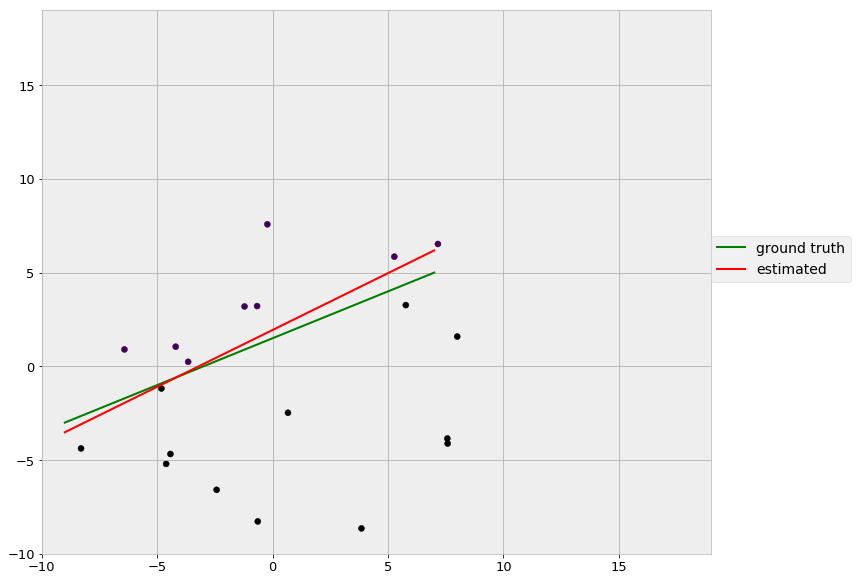

In [16]:
# plot the points
plt.scatter(data[0, ixs_pos], data[1, ixs_pos], c=['0'] * in_neg)
plt.scatter(data[0, ixs_neg], data[1, ixs_neg], c=['1'] * in_neg)
# plot the actual line
y_actual = (-b - x * a[0, 0]) * 1.0 / a[0, 1]
plt.plot(x, y_actual, color='g', label='ground truth')
# plot the best line found by perceptron
y = (-w_best[0,0] - x * w_best[0,1]) * 1.0 / w_best[0,2]
plt.plot(x, y, color='r', label='estimated')

plt.axis((val_min-offset,val_max+offset,val_min-offset,val_max+offset))
plt.legend(loc=(1,0.5))
plt.show()

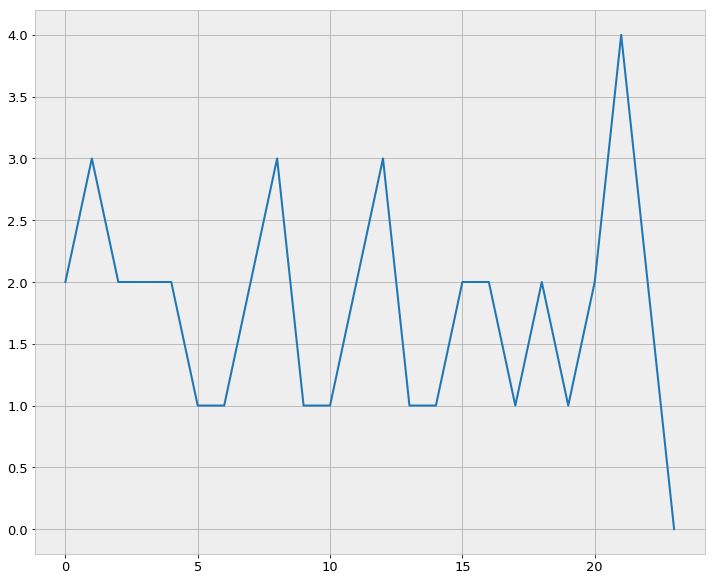

In [17]:
plt.plot(range(len(in_discrepancies_all)), in_discrepancies_all)
plt.show()